# Pytorch Workflow

Let's explore an example end-to-end workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating the model",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cpu'

## 1. Data (preparing and loading)

Data can be almost anything ... in machine learning.
* Exel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like song or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical rrepresentation.
2. Build a model to learn patterns in that numerical representations.

To showcase this, let's create some *known* data using the linear regression formula.
We'll use a linear regression formula to make straingt line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim= 1)
y= weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plot training data, test data and compares predictions
    """
    plt.figure(figsize= (10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c= 'b', s= 4, label= "Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c= 'g', s= 4, label= "Testing data")
    
    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c= 'r', s= 4, label= "Predictions")
        
    # Show the legend
    plt.legend(prop= {"size" : 14})

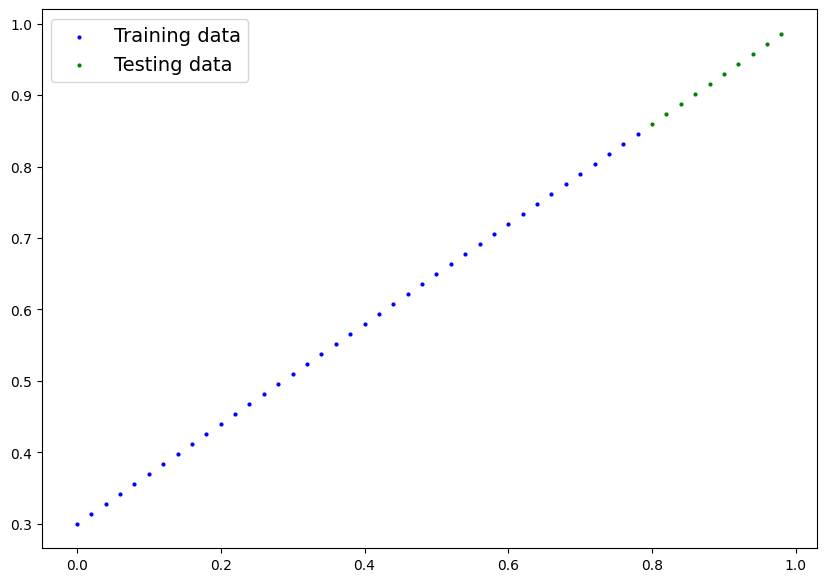

In [7]:
plot_predictions()

## 2. Buld model

Our first PyTorch model

This is very exciting ... Let's do it!

What our model does:
* Start with random values (weight & bias)
* Look ar training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype= torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= float))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.weight * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learning, often a PyTorch layer from torch.nn will det these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overide forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created model, let's see what's inside ...

So we can check our parameters or what's inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction using `torch.inference_mode()`

To check our model's predictve power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

"""with torch.no_grad():
    y_preds = model_0(X_test)"""

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these maybe random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas.
  
Things we need to train:
* Loss function
* Optimizer

And specifically for PyTorch, we need:
* Training loop
* Testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [15]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.01) # learning rate

In [16]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward` functions) - also called forward propagation
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [18]:
torch.manual_seed(42)

# An epoch is one loop through the data
epochs = 1000

# Loop through the data
for epoch in range(epochs):
    # Set the model to traning mode
    model_0.train() # train mode in PyTorch sets all parameters that requires gradients
    
    # Forward pass
    y_pred = model_0(X_train)
    
    # Calculate the loss
    loss = loss_fn(y_train, y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Perform backpropagation
    loss.backward()
    
    # Step the optimizer
    optimizer.step()
    
    model_0.eval() # turn off gradient tracking
    
    if epoch % 10 == 0:
        with torch.inference_mode():
            y_test_pred = model_0(X_test)
            test_loss = loss_fn(y_test, y_test_pred)
            print("Epoch: {}---------------Loss: {}----------------Test loss: {}".format(epoch,loss ,test_loss))

Epoch: 0---------------Loss: 0.3128813517678373----------------Test loss: 0.4810651795382455
Epoch: 10---------------Loss: 0.19767138632506426----------------Test loss: 0.346355255078788
Epoch: 20---------------Loss: 0.08908726094682914----------------Test loss: 0.21729659528684148
Epoch: 30---------------Loss: 0.05314853437903411----------------Test loss: 0.14464020247411263
Epoch: 40---------------Loss: 0.045437965798191725----------------Test loss: 0.11360953504991064
Epoch: 50---------------Loss: 0.04167863324115598----------------Test loss: 0.09919951553296583
Epoch: 60---------------Loss: 0.03818932177440422----------------Test loss: 0.08886642379712592
Epoch: 70---------------Loss: 0.034760872570398914----------------Test loss: 0.08059396738957894
Epoch: 80---------------Loss: 0.031323813460567805----------------Test loss: 0.07232151694249642
Epoch: 90---------------Loss: 0.027887361238497978----------------Test loss: 0.06473595685910709
Epoch: 100---------------Loss: 0.02445891

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], dtype=torch.float64, requires_grad=True)]

In [20]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]], dtype=torch.float64))

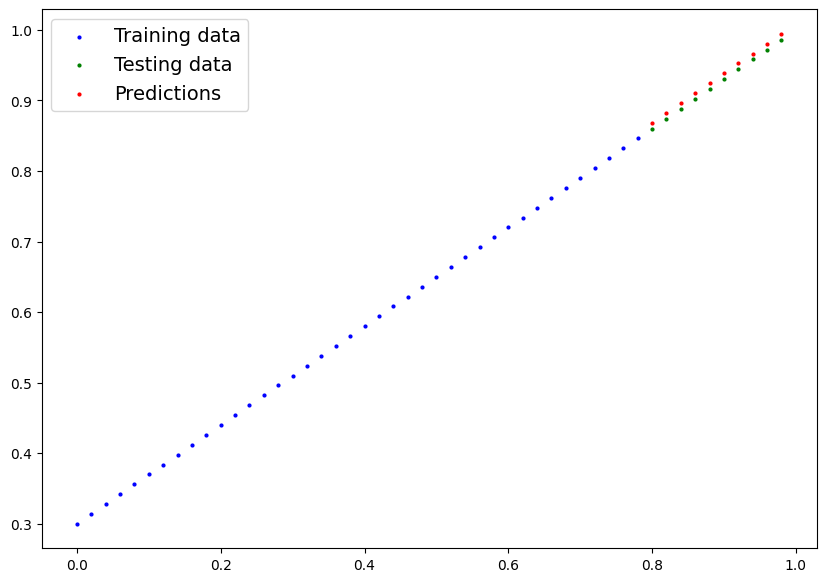

In [21]:
plot_predictions(predictions= y_preds)

## Saving a model in PyTorch

There are three main methods:

1. `torch.save` - allows you save a PyTorch object in Python's pickle format
2. `torch.load` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict` - this allows to load a model's saved state dictionary

In [22]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [23]:
# Saving our PyTorch model
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# Create model save path
MODEL_NAME = "00_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(obj= model_0.state_dict(),
           f= MODEL_SAVE_PATH)

## Loading a PyTorch model

In [24]:
# Instantiation a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the model state dict of model_0
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [26]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [27]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])